In [1]:
#things to be import

import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.autograd as atgd
import torch.optim as optim
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading training and testing data

batchsize = 16

transform = transforms.Compose(
    [
    transforms.Resize((32,32)),    
    transforms.ToTensor(),
    ])

train_dataset = torchvision.datasets.MNIST(root = './data/mnist', 
                           train = False, 
                           transform = transform,
                           download = True) 
test_dataset = torchvision.datasets.MNIST(root = './data/mnist',
                           train = True,
                           transform = transform,
                           download = True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=2)

print("The number of training images: ", len(train_loader)*batchsize)
print("The number of testing images: ", len(test_loader)*batchsize)


print("Data load OK!")

The number of training images:  10000
The number of testing images:  60000
Data load OK!


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)

        self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(16*6*6, 10)
        
        
        self.conv3 = nn.Conv2d(16, 10, 5)
#         self.sm = nn.Softmax()
#         self.fc2 = nn.Linear(100, 64)
#         self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
#         print("1",x.size())
        x = self.pool(func.relu(self.conv1(x)))
#         print("2",x.size())
        x = self.pool(func.relu(self.conv2(x)))
#         x = self.pool(func.relu(self.conv3(x)))
#         print("3",x.size())
#         x = x.view(-1, 16 * 6 * 6)
#         x = func.relu(self.fc1(x))


        x = self.conv3(x)
        
    
#         print("4", x.size())
#         x = x.view(-1,10)
#         x = self.fc1(x)
#         x = self.sm(self.fc1(x))
#         x = func.relu(self.fc2(x))
#         x = self.fc3(x)
        return x

net = Net()

print("Network Structure: ")
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Network Structure: 
Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 10, kernel_size=(5, 5), stride=(1, 1))
)


In [4]:
#training process

epoch_num = 5
x1 = range(1,epoch_num+1)
x2 = range(1,epoch_num+1)
accuracy1 = []
accuracy2 = []
loss1 = []
loss2 = []


for epoch in range(epoch_num): 
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()     
        outputs = net(inputs)
        outputs = outputs.view(-1,10)
        
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()


    print("epoch number %d" % (epoch + 1))
    
    correct = 0
    total = 0
    running_loss = 0
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        outputs = outputs.view(-1,10)
        
        
        train_loss = criterion(outputs, labels)
        running_loss += train_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('train_accuracy: %.3f %%' % (100 * correct / total))
    accuracy1.append(100 * correct / total)
    print("train_loss: %.3f" % (running_loss / (len(train_loader)*batchsize) ))
    loss1.append(running_loss / (len(train_loader)*batchsize))
    
    # testing accuracy and loss
    correct = 0
    total = 0
    running_loss = 0
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        outputs = outputs.view(-1,10)
        test_loss = criterion(outputs, labels)
        running_loss += test_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('test_accuracy: %.3f %%' % (100 * correct / total))
    accuracy2.append(100 * correct / total)
    print("test_loss: %.3f" % (running_loss / (len(test_loader)*batchsize) ))
    loss2.append(running_loss / (len(test_loader)*batchsize))

print("Training OK!")




epoch number 1
train_accuracy: 85.930 %
train_loss: 0.026
test_accuracy: 84.928 %
test_loss: 0.028
epoch number 2
train_accuracy: 93.600 %
train_loss: 0.013
test_accuracy: 92.333 %
test_loss: 0.016
epoch number 3
train_accuracy: 95.120 %
train_loss: 0.010
test_accuracy: 93.598 %
test_loss: 0.013
epoch number 4
train_accuracy: 96.060 %
train_loss: 0.008
test_accuracy: 94.627 %
test_loss: 0.011
epoch number 5
train_accuracy: 96.740 %
train_loss: 0.007
test_accuracy: 95.133 %
test_loss: 0.010
Training OK!


torch.Size([1, 1, 64, 64])
torch.Size([1, 10, 9, 9])
torch.Size([10, 9, 9])


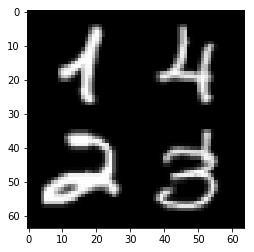

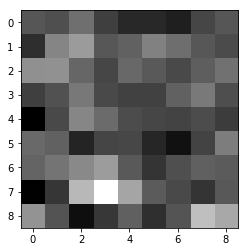

In [15]:
combine_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

for data in combine_loader:
    images, _ = data
   
    combine = torch.cat((torch.cat((images[0], images[1]),1) , torch.cat((images[2], images[3]),1)),2)
    combine = combine.view(1,1,64,64)
    print(combine.size())
    plt.figure(0)
    plt.imshow(combine.squeeze(), cmap = "gray")
    
    
    outputs = net(combine)
    print(outputs.size())
    
    outputs = outputs.squeeze()
    print(outputs.size())
    plt.figure(1)
    plt.imshow(outputs[8].detach(), cmap="gray")
    break
#     print(images.size())